In [1]:
### %matplotlib inline

import os,sys,inspect
PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fma_metadata import utils

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/gaetanoantonicchio/Downloads/ts_dataset_Fede.csv')

In [3]:
df.head()

track_id            0            1            2            3            4  \
0         2  1753.560229  2257.466861  2882.222974  2670.961118  2111.101477   
1         5  1063.952553  1073.580479   929.287077   935.735381  1423.752755   
2       148   854.195714   929.899905  1074.438149  1106.270403  1262.605776   
3       182  1935.067371  1944.322028  2033.296617  2056.287808  1980.944183   
4       255  1058.040165  1030.117320  1019.887341   994.122747   971.307168   

             5            6            7            8  ...          647  \
0  2032.723377  2203.948417  2010.167976  2087.718374  ...  2490.791964   
1  1706.984032  1727.663239  1250.945719  1086.371810  ...  1784.380570   
2  1260.138068  1284.212077  1428.672989  1632.183927  ...  1613.198016   
3  1920.720428  2093.844116  2219.083104  2259.879382  ...  1659.613066   
4   982.655750  1015.293813   919.057637   876.318176  ...   909.310526   

           648          649          650          651          652  \
0  2108.328245  2279.144320  2483.595672  2485.493595  2283.669119   
1  1655.845934  1542.638447  1329.698678  1609.129768  1637.752364   
2  1604.099335  1616.798575  1580.397821  1552.878064  1551.043023   
3  1765.649337  1972.606639  2059.421914  1950.256330  1769.939838   
4   787.699413   786.786420   966.045405  1120.767451  1099.290394   

           653          654          655          656  
0  1909.055744  1286.629299  1225.566106  1242.179012  
1  1723.875319  1843.045431  1947.498431  1830.323977  
2  1559.632696  1575.169382  1581.174697  1512.527248  
3  1802.032154  1858.346644  1845.767989  1873.613617  
4  1054.891137   995.573291   871.263998   740.037442  

[5 rows x 658 columns]

In [4]:
df.set_index('track_id', inplace=True)

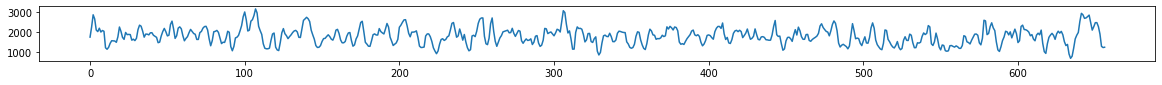

In [5]:
plt.figure(figsize=(20,1))
plt.plot(df.iloc[0,:].values)

# Preprocessing

In [6]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
norm_df = scaler.fit_transform(df)
norm_df = norm_df.squeeze()
df = pd.DataFrame(norm_df, index=df.index)

In [7]:
# apply moving average to dataset
w = 3
for i in range(norm_df.shape[0]):
    df.iloc[i,:] = (df.iloc[i,:] - df.iloc[i,:].mean()/df.iloc[i,:].std()).rolling(window=w).mean()

In [8]:
df.dropna(inplace=True, axis=1)

# Import artists

In [9]:
tracks = utils.load("/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv")

In [10]:
artist = tracks['artist'][['name']]

In [11]:
song_name = tracks['track'][['title']]

In [12]:
df = df.merge(artist, on='track_id')

In [13]:
genre = tracks['track'][['genre_top']]

In [14]:
df = df.merge(genre, on='track_id')

In [15]:
df = df.merge(song_name, on='track_id')

In [16]:
df.head()

2         3         4         5         6         7  \
track_id                                                               
2         1.189444  1.933395  1.814702  1.125815  0.747099  0.665248   
5        -1.025630 -1.138461 -0.830310 -0.145938  0.550958  0.398888   
148      -1.112911 -0.869556 -0.548359 -0.369083 -0.197297 -0.036975   
182       0.970249  1.126305  1.173452  1.028524  1.076873  1.383447   
255      -0.086795 -0.169704 -0.245989 -0.294283 -0.266821 -0.334596   

                 8         9        10        11  ...       650       651  \
track_id                                          ...                       
2         0.709846  0.584026 -0.060399 -0.828887  ...  1.171456  1.477312   
5        -0.147250 -0.483644 -0.362152 -0.078099  ...  0.260367  0.219257   
148       0.322201  0.792548  1.173474  1.314217  ...  0.762646  0.713197   
182       1.820071  1.898354  1.663680  1.105963  ...  0.822191  1.059849   
255      -0.472530 -0.837053 -1.065860 -1.126315  ... -0.822936 -0.390902   

               652       653       654       655       656  \
track_id                                                     
2         1.480981  1.015068  0.042869 -0.815182 -1.355974   
5         0.302957  0.649832  0.855678  1.128254  1.221929   
148       0.649716  0.629669  0.651189  0.680279  0.634803   
182       0.798941  0.467584  0.349262  0.446881  0.539033   
255       0.014458  0.129702 -0.032691 -0.328472 -0.736879   

                                   name     genre_top                  title  
track_id                                                                      
2                                  AWOL       Hip-Hop                   Food  
5                                  AWOL       Hip-Hop             This World  
148                       Contradiction  Experimental             Blackout 2  
182       Ariel Pink's Haunted Graffiti          Rock  Jules Lost His Jewels  
255                          Bird Names          Rock      We Want to be Old  

[5 rows x 658 columns]

In [17]:
df[df['genre_top']=='Rock']['name'].value_counts()[:10]

The Vivisectors     21
Scott Holmes        21
Throwing Muses      15
Jahzzar             14
Atlantic Thrills    12
Sleep Out           11
Half Japanese       11
Lamprey             11
et_                 11
Lorenzo's Music     10
Name: name, dtype: int64

In [18]:
df[df['genre_top']=='Hip-Hop']['name'].value_counts()[:10]

The Impossebulls      68
Kellee Maize          55
C-Doc                 42
6th Sense             33
Tha Silent Partner    33
Alaclair Ensemble     29
Black Ant             24
Cullah                17
Dengaz                16
BenJamin Banger       16
Name: name, dtype: int64

In [19]:
df[df['genre_top']=='Electronic']['name'].value_counts()[:10]

SPCZ                      30
Jason Shaw                21
Decktonic                 20
Azureflux                 15
Broke For Free            15
UncleBibby                15
Goto80                    13
Rolemusic                 13
Frame                     12
Psychadelik Pedestrian    12
Name: name, dtype: int64

In [20]:
df[df['genre_top']=='Experimental']['name'].value_counts()[:10]

File Under Toner                29
Lucky Dragons                   24
Justice Yeldham                 22
ODOR BABY                       21
The Fucked Up Beat              16
Monroeville Music Center        13
Fields Ohio                     12
PC-ONE                          12
Lezet                           12
Asian Women on the Telephone    11
Name: name, dtype: int64

# Filetring dataset by artists 

In [27]:
#HIP-HOP
df_cdoc = df[df['name']=='C-Doc'].iloc[:,:-3]
cdoc_songtitle = df[df['name']=='C-Doc']['title'].values

df_6ix = df[df['name']=='6th Sense'].iloc[:,:-3]
_6ix_songtitle = df[df['name']=='6th Sense']['title'].values

#ROCK
df_vivi = df[df['name']=='The Vivisectors'].iloc[:,:-3]
df_holmes = df[df['name']=='Scott Holmes'].iloc[:,:-3]

In [28]:
id_cdoc = df_cdoc.index
df_cdoc = df_cdoc.values

id_6ix = df_6ix.index
df_6ix = df_6ix.values

id_vivi = df_vivi.index
df_vivi = df_vivi.values

id_holmes = df_holmes.index
df_holmes = df_holmes.values

In [29]:
from matrixprofile import *

# HIP-HOP ---------  ♬

In [30]:
print("number of C-Doc tracks:", df_cdoc.shape[0])

number of C-Doc tracks: 42


# Matrix Profile: C-DOC ♬

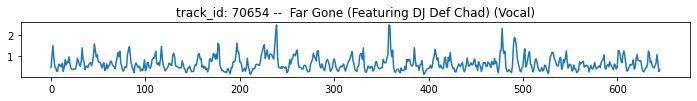

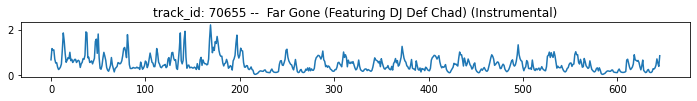

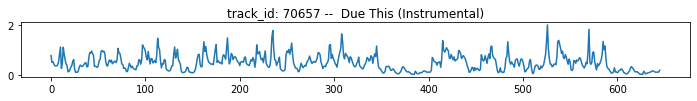

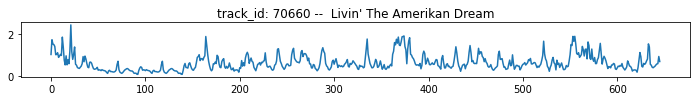

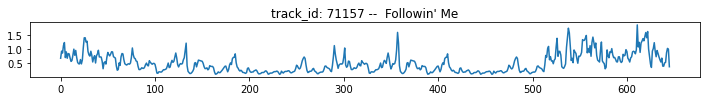

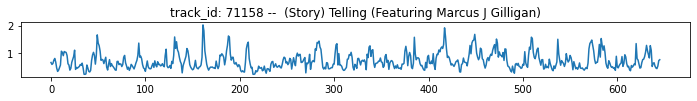

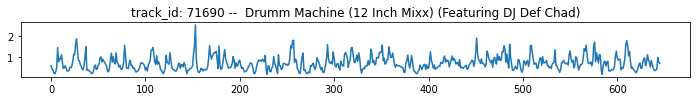

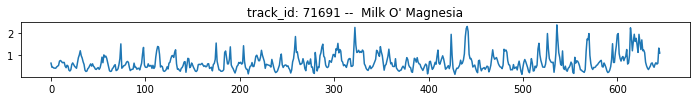

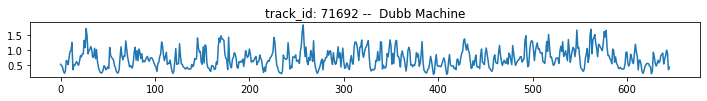

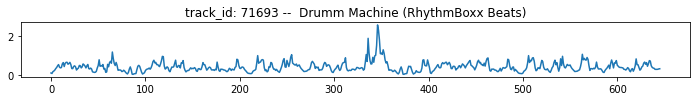

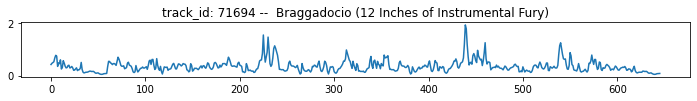

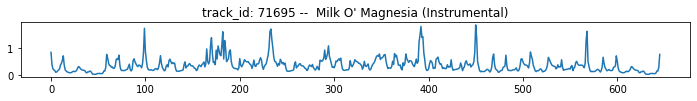

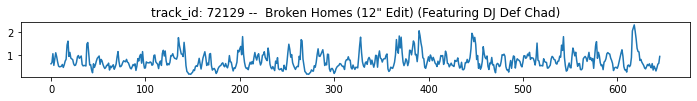

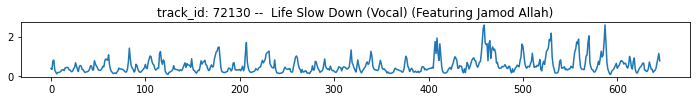

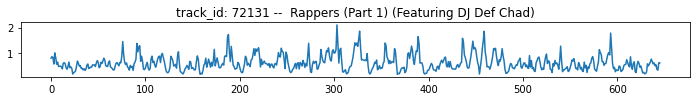

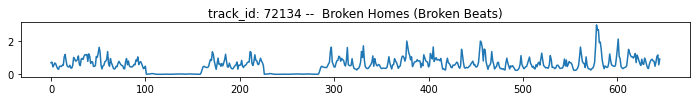

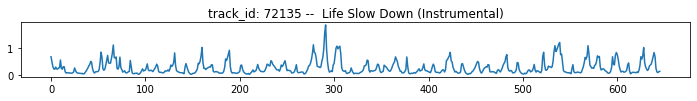

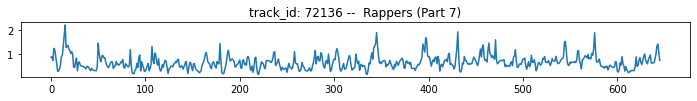

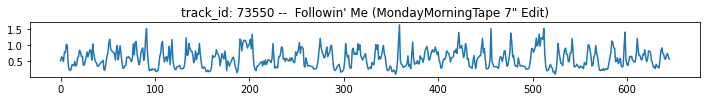

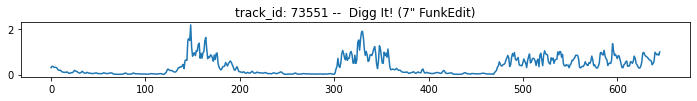

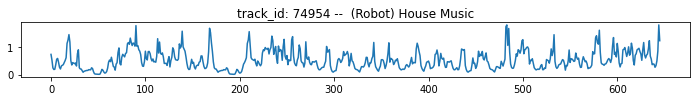

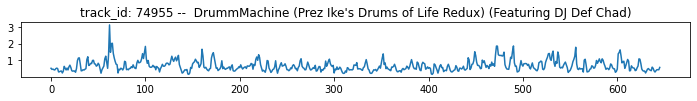

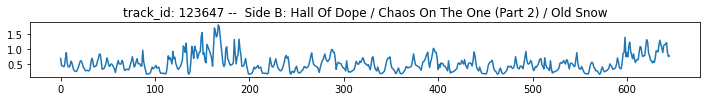

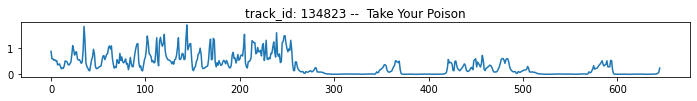

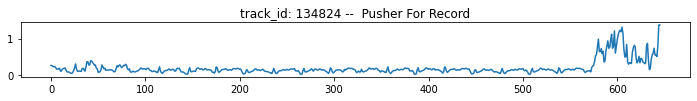

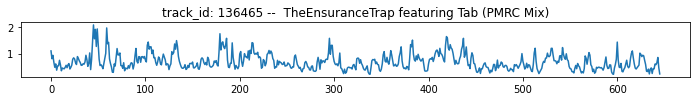

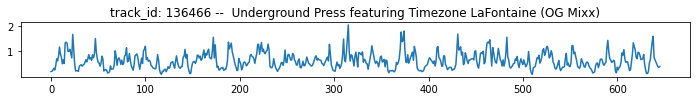

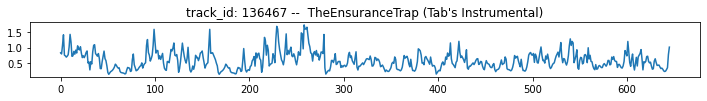

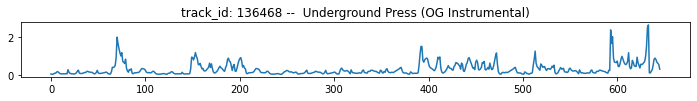

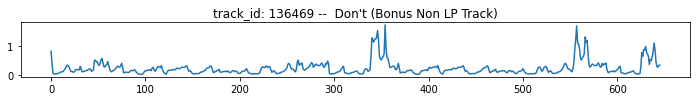

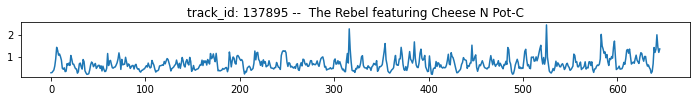

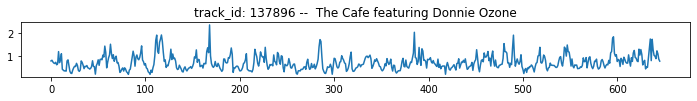

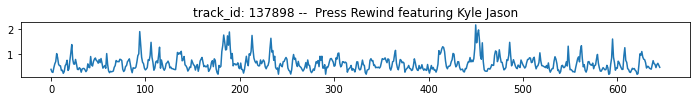

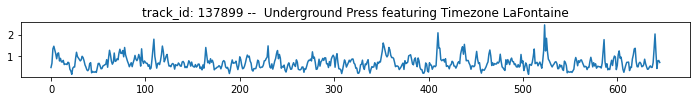

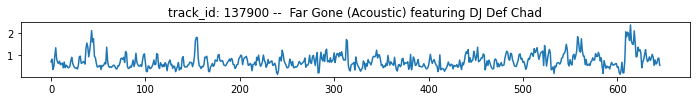

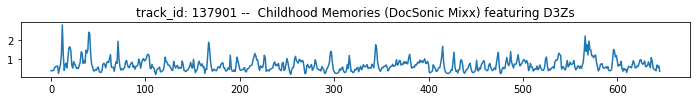

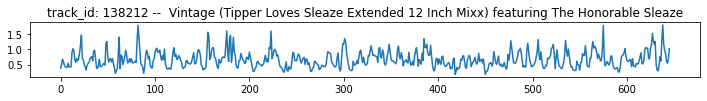

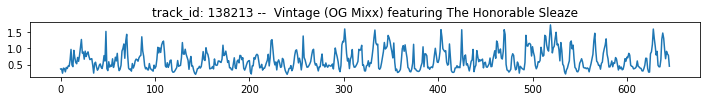

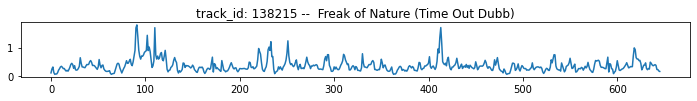

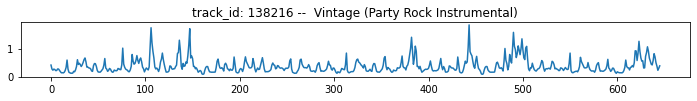

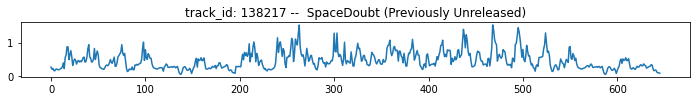

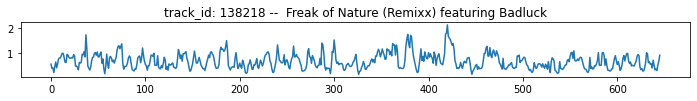

In [31]:
mp_cdoc = []
mpi_cdoc = []

for track, track_id, title in zip(df_cdoc, id_cdoc, cdoc_songtitle):
    plt.figure(figsize=(12,1))
    w = 10
    mp, mpi = matrixProfile.stomp(track, w)
    mp_cdoc.append(mp)
    mpi_cdoc.append(mpi)
    plt.title("track_id: {} --  {}".format(track_id, title))
    plt.plot(mp)
    plt.show()
    

# Motifs Discovery: C-DOC

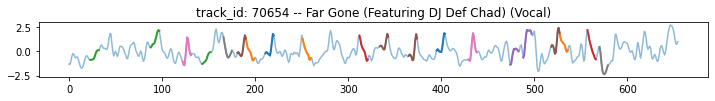

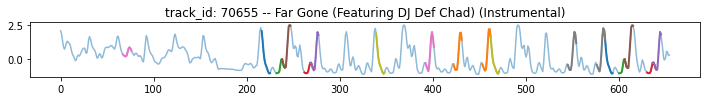

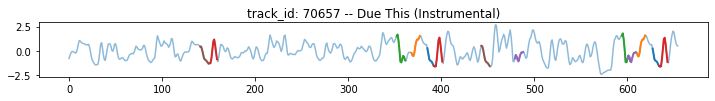

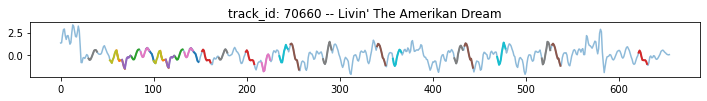

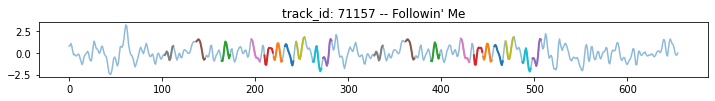

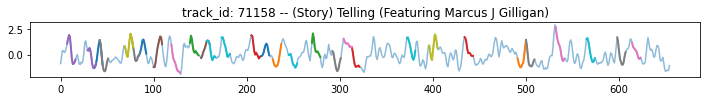

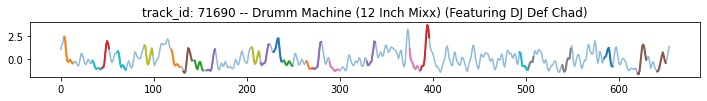

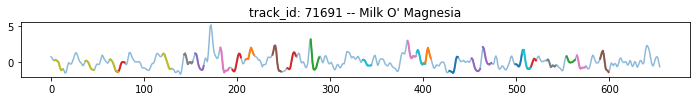

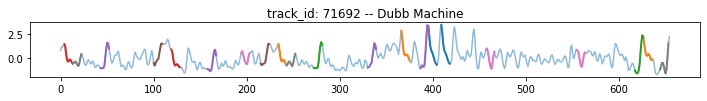

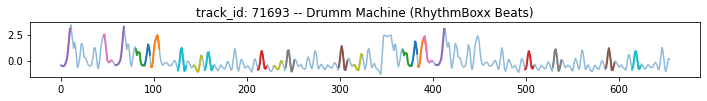

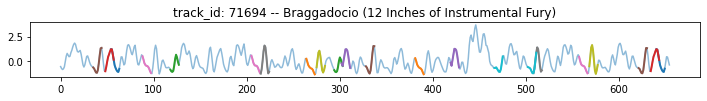

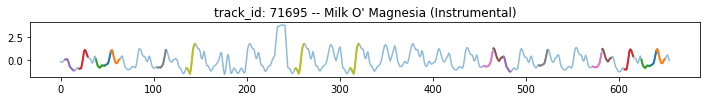

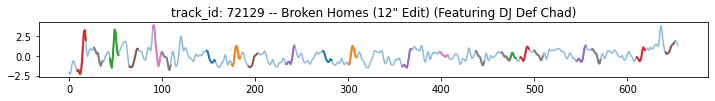

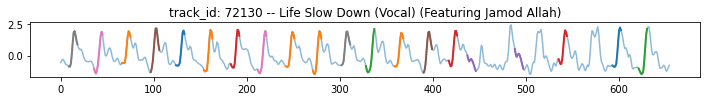

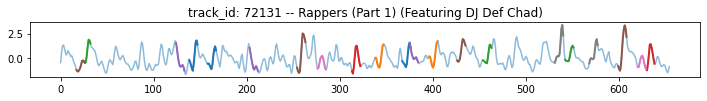

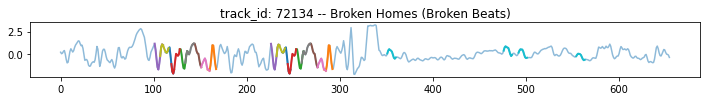

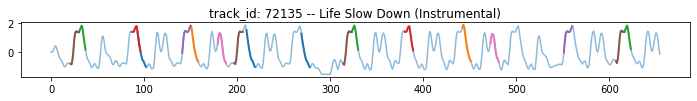

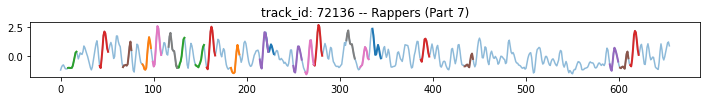

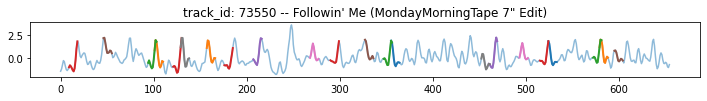

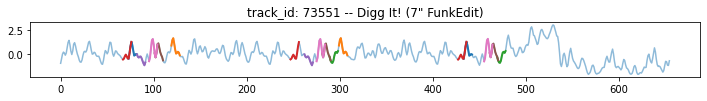

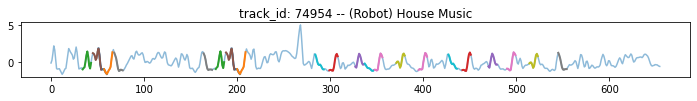

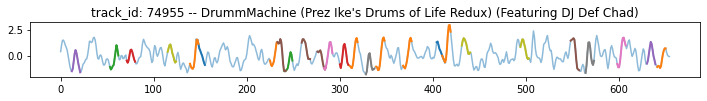

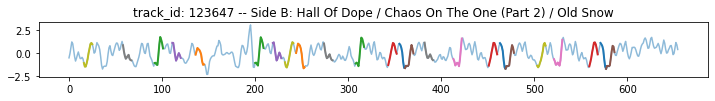

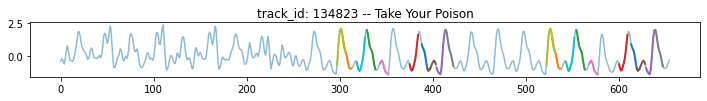

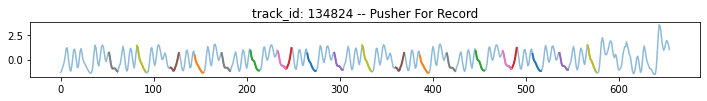

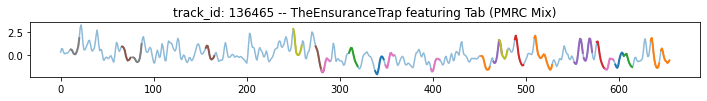

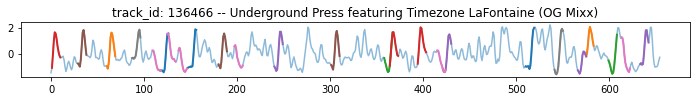

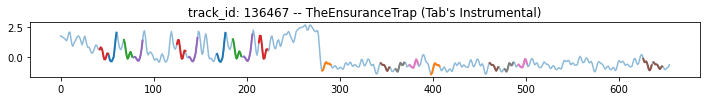

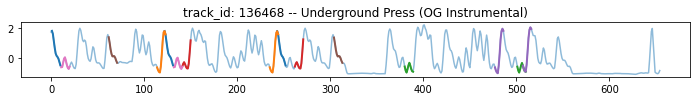

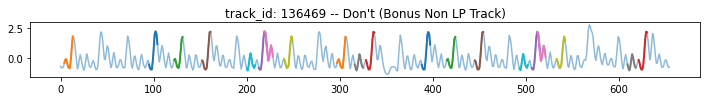

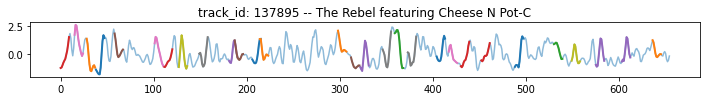

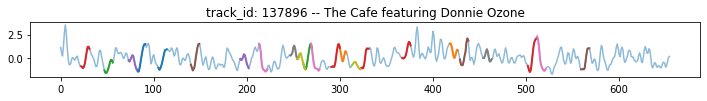

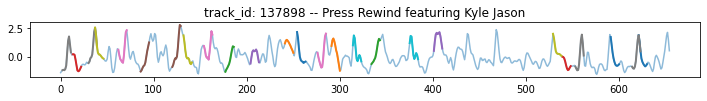

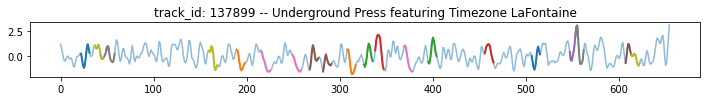

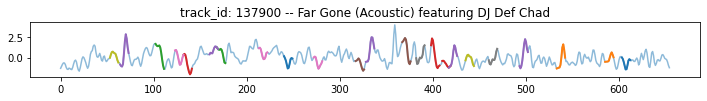

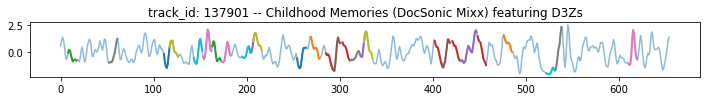

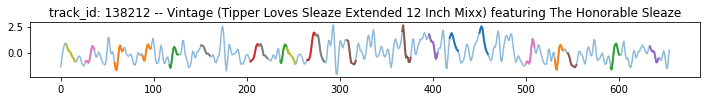

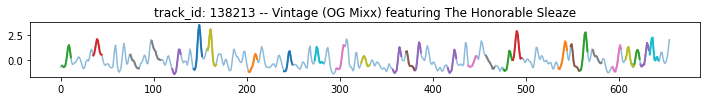

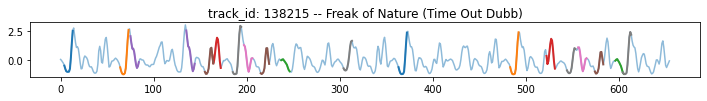

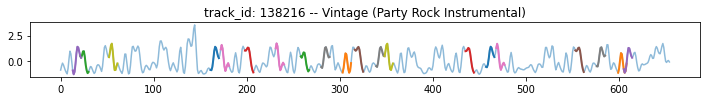

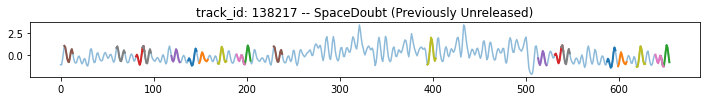

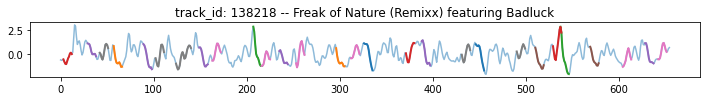

In [32]:
for track, mp, mpi, track_id, title in zip(df_cdoc, mp_cdoc, mpi_cdoc, id_cdoc, cdoc_songtitle):
    mo, mod  = motifs.motifs(track, (mp, mpi), max_motifs=10)
    plt.figure(figsize=(12,1))
    plt.plot(track,alpha=0.5)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = track[i:i+w]
            plt.title("track_id: {} -- {}".format(track_id, title))
            plt.plot(range(i,i+w), m_shape, color=c, lw=2, alpha=1)

    plt.show()
    

# Best motifs

In [122]:
#help(motifs)

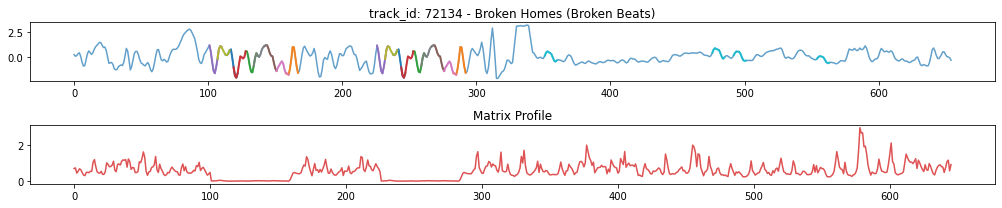

In [33]:
# Broken Homes

fig, ax = plt.subplots(2, 1,figsize=(14,3))

w = 10
mp, mpi = matrixProfile.stomp(df_cdoc[15,:], w)
mo, mod  = motifs.motifs(df_cdoc[15,:], (mp, mpi), max_motifs=10)

ax[0].plot(df_cdoc[15,:],alpha=0.7)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_cdoc[15,:][i:i+w]
        ax[0].set_title("track_id: {} - {}".format(id_cdoc[15], cdoc_songtitle[15]))
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=2, alpha=0.9)


color = 'tab:red'
ax[1].set_title('Matrix Profile')
ax[1].plot(mp_cdoc[15], color=color, alpha=0.8)

fig.tight_layout()


In [34]:
print('MOTIFS INDEX:', mo)

MOTIFS INDEX: [[113, 238], [158, 283], [128, 253], [119, 244], [101, 226], [142, 267], [151, 276], [134, 259], [107, 232], [351, 476, 492, 554]]


In [35]:
print('MOTIFS DISTANCE:', mod)

MOTIFS DISTANCE: [0.004066791567636197, 0.005434302251580524, 0.005663810481694128, 0.007153074388332761, 0.011376168453427538, 0.013523844132949103, 0.017247127560848965, 0.02077111341715615, 0.05177279097455474, 0.24572664425056143]


 MOTIFS - track: 72134 - C_DOC 


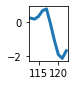

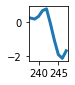

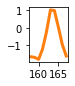

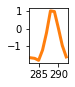

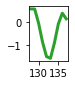

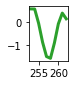

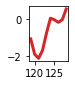

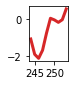

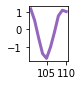

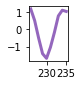

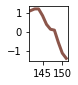

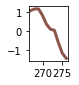

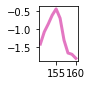

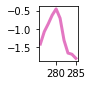

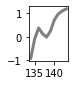

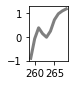

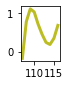

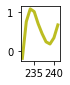

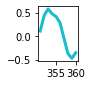

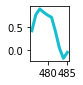

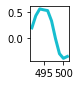

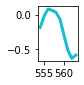

In [36]:
print(' MOTIFS - track: 72134 - C_DOC ')
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_cdoc[15,:][i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

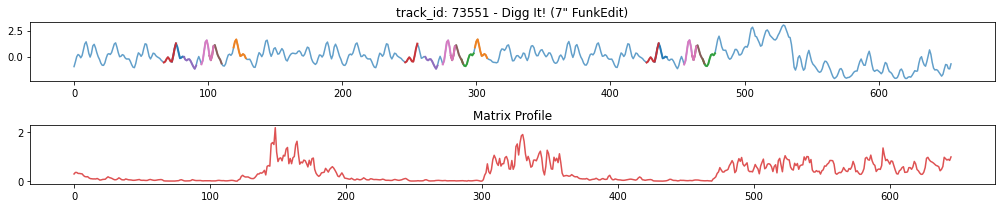

In [37]:
# Digg it!

fig, ax = plt.subplots(2, 1,figsize=(14,3))

w = 10
mp, mpi = matrixProfile.stomp(df_cdoc[19,:], w)
mo, mod  = motifs.motifs(df_cdoc[19,:], (mp, mpi), max_motifs=10)

ax[0].plot(df_cdoc[19,:],alpha=0.7)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_cdoc[19,:][i:i+w]
        ax[0].set_title("track_id: {} - {}".format(id_cdoc[19], cdoc_songtitle[19]))
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=2, alpha=0.9)


color = 'tab:red'
ax[1].set_title('Matrix Profile')
ax[1].plot(mp_cdoc[19], color=color, alpha=0.8)

fig.tight_layout()


There is a clear pattern repeating every 100 frames for 3 times.
As we can see from the Matrix profile at frames 100, 250 and 400 there is almost a perfect matching of motfis.

# Matrix Profile: 6th-SENSE ♬

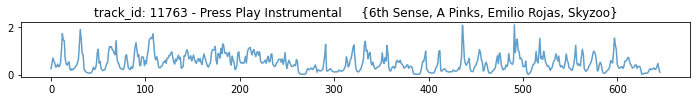

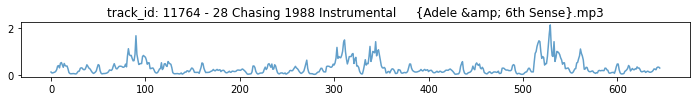

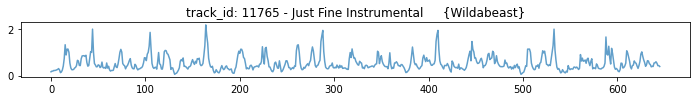

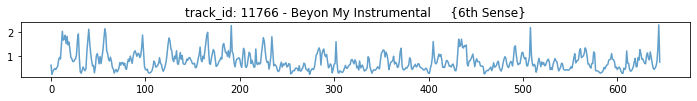

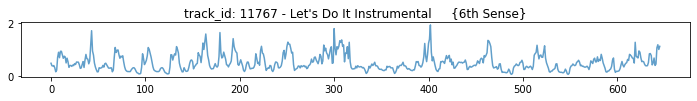

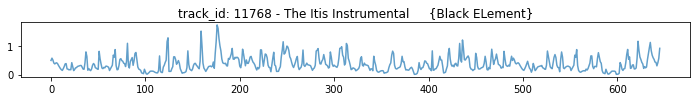

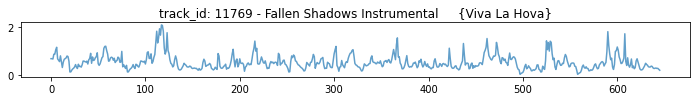

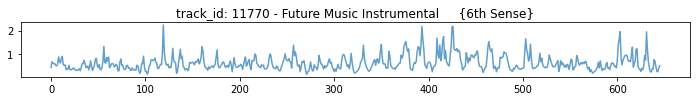

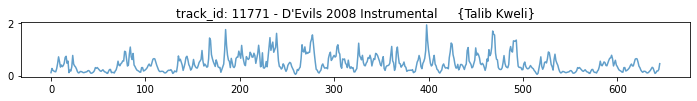

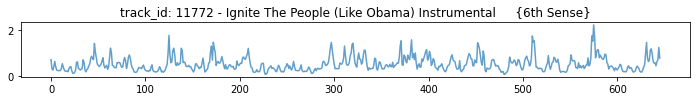

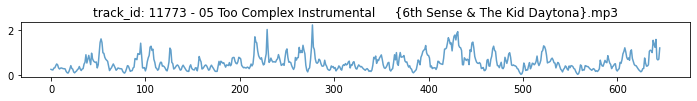

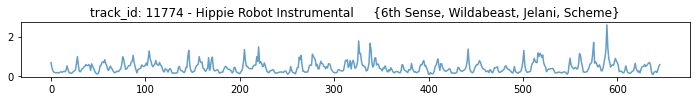

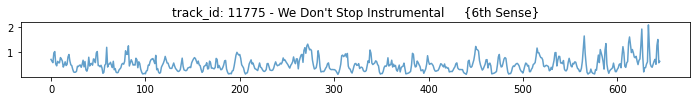

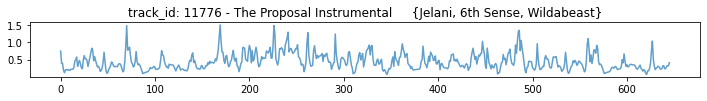

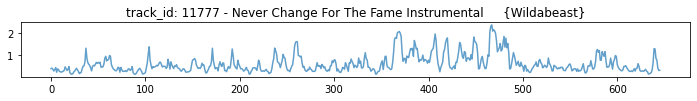

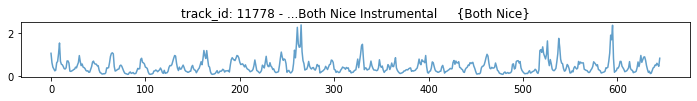

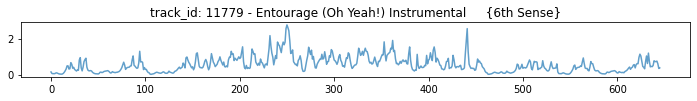

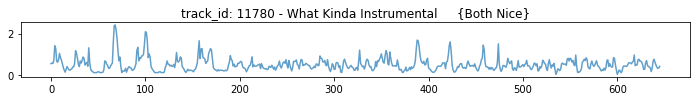

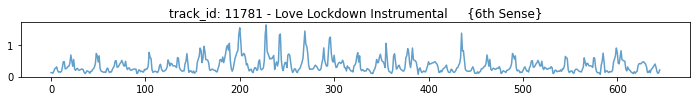

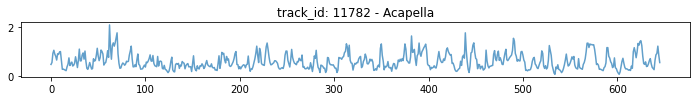

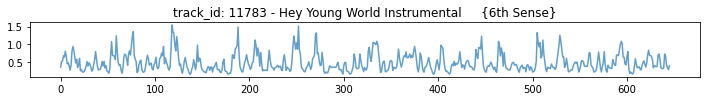

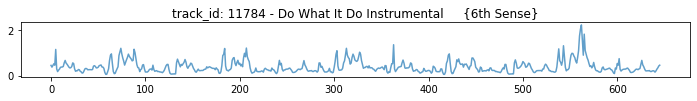

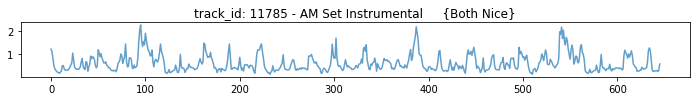

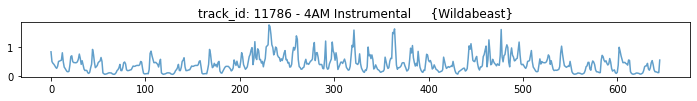

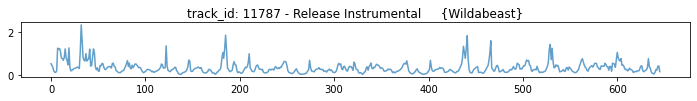

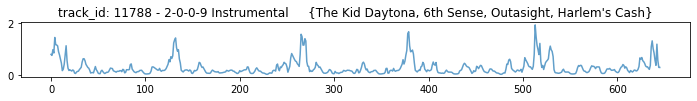

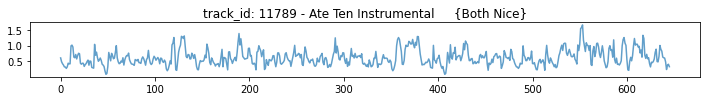

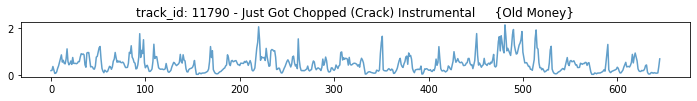

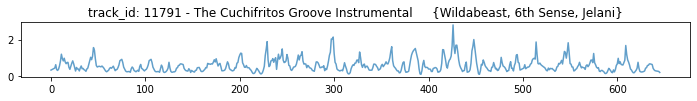

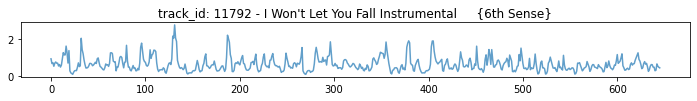

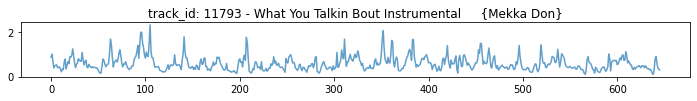

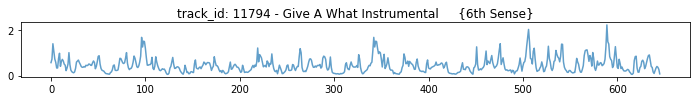

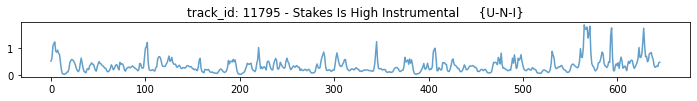

In [38]:
mp_6ix = []
mpi_6ix = []

for track, track_id , title in zip(df_6ix, id_6ix, _6ix_songtitle):
    plt.figure(figsize=(12,1))
    w = 10
    mp, mpi = matrixProfile.stomp(track, w)
    mp_6ix.append(mp)
    mpi_6ix.append(mpi)
    plt.title("track_id: {} - {}".format(track_id, title))
    plt.plot(mp, alpha=0.7)
    plt.show()
    

# Motifs Discovery: 6th-Sense

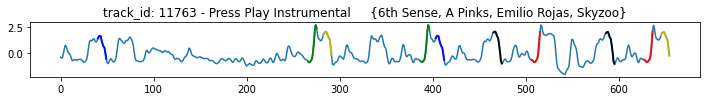

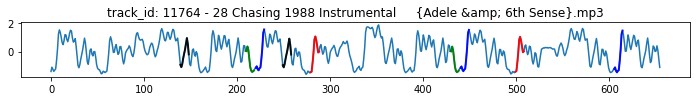

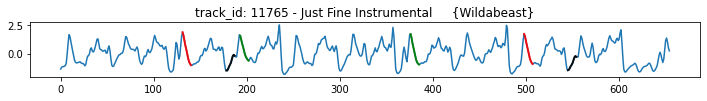

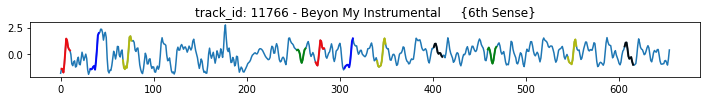

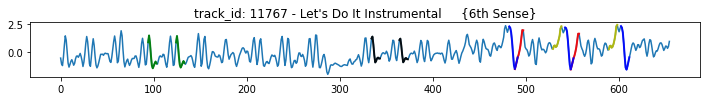

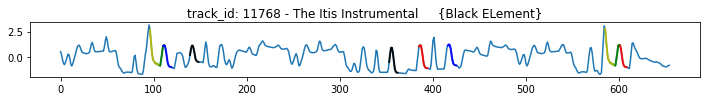

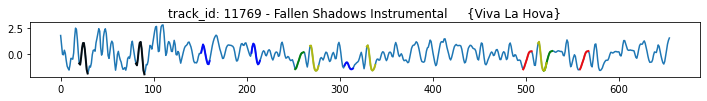

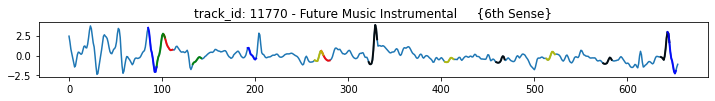

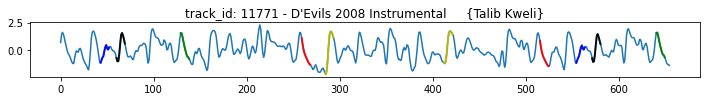

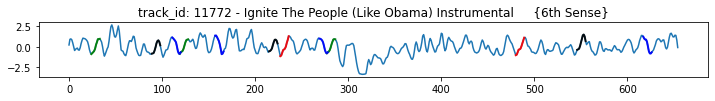

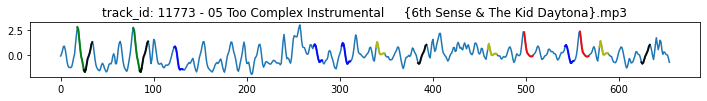

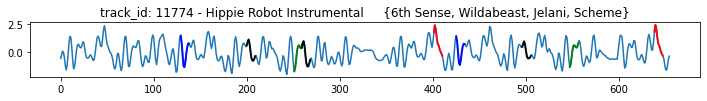

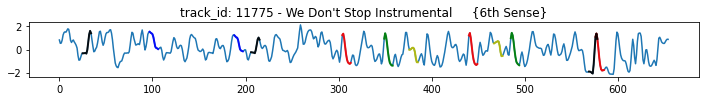

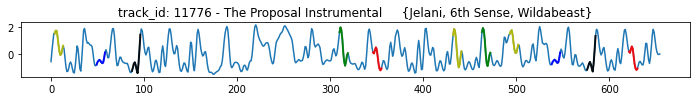

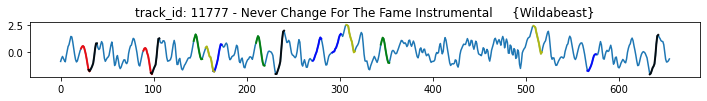

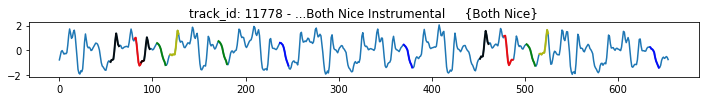

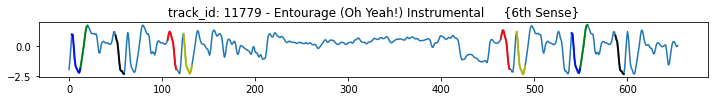

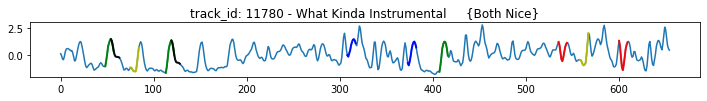

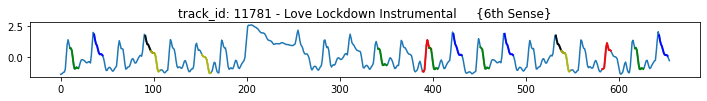

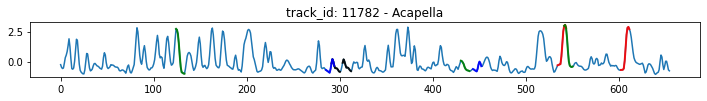

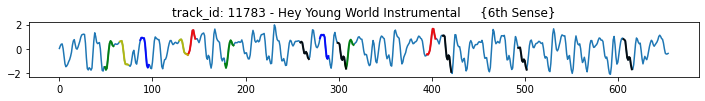

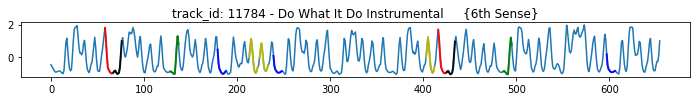

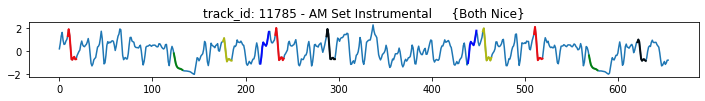

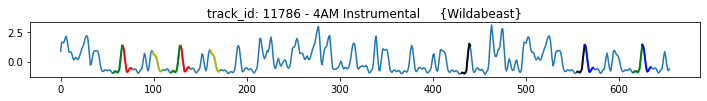

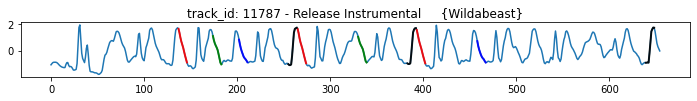

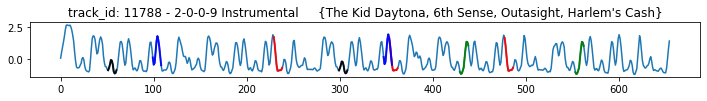

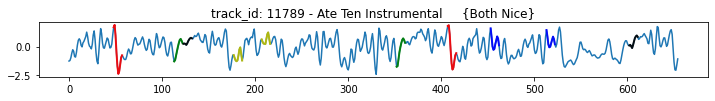

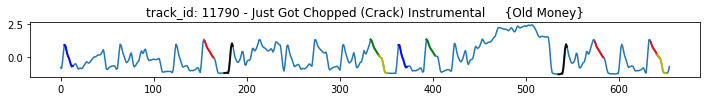

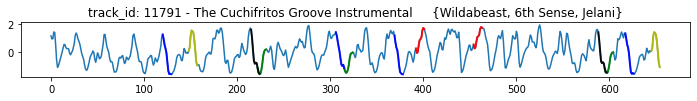

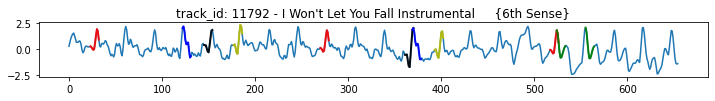

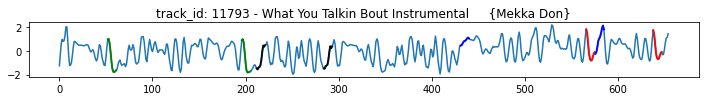

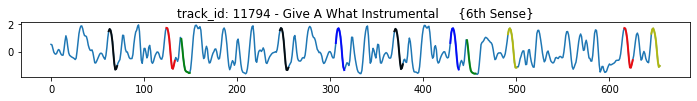

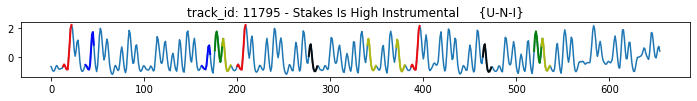

In [39]:
for track, mp, mpi, track_id, title in zip(df_6ix, mp_6ix, mpi_6ix, id_6ix, _6ix_songtitle):
    mo, mod  = motifs.motifs(track, (mp, mpi), max_motifs=5)
    plt.figure(figsize=(12,1))
    plt.plot(track)
    colors = ['r', 'g', 'k', 'b', 'y','c'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = track[i:i+w]
            plt.title("track_id: {} - {}".format(track_id, title))
            plt.plot(range(i,i+w), m_shape, color=c, lw=2, alpha=0.9)

    plt.show()
    

# Best Motifs

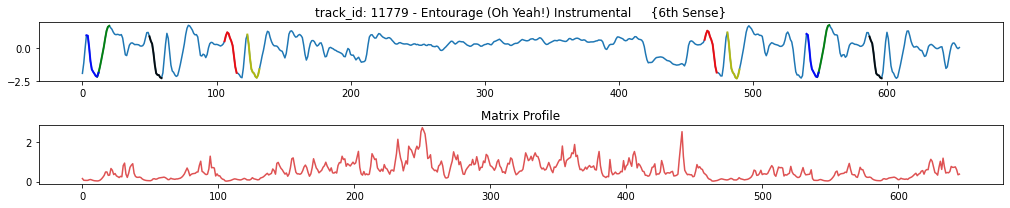

In [40]:
fig, ax = plt.subplots(2, 1,figsize=(14,3))

w = 10
mp, mpi = matrixProfile.stomp(df_6ix[16,:], w)
mo, mod  = motifs.motifs(df_6ix[16,:], (mp, mpi), max_motifs=5)

ax[0].plot(df_6ix[16,:])
colors = ['r', 'g', 'k', 'b', 'y','c'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_6ix[16,:][i:i+w]
        ax[0].set_title("track_id: {} - {}".format(id_6ix[16], _6ix_songtitle[16]))
        ax[0].plot(range(i,i+w), m_shape, color=c, lw=2, alpha=0.9)


color = 'tab:red'
ax[1].set_title('Matrix Profile')
ax[1].plot(mp_6ix[16], color=color, alpha=0.8)

fig.tight_layout()


In [41]:
print('MOTIFS INDEX:', mo)

MOTIFS INDEX: [[106, 464], [11, 548], [50, 587], [3, 540], [123, 481]]


In [42]:
print('MOTIFS DISTANCE:', mod)

MOTIFS DISTANCE: [0.01980964140185325, 0.028717713551095245, 0.04032521423019931, 0.05583264534539616, 0.07846078276227261]


 MOTIFS - track: 72134 - C_DOC 


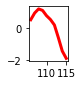

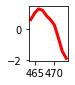

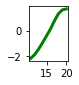

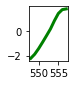

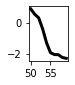

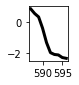

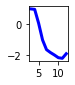

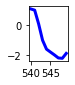

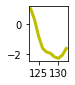

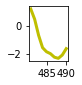

In [43]:
print(' MOTIFS - track: 72134 - C_DOC ')
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df_6ix[16,:][i:i+w]
        plt.figure(figsize=(0.7,1))
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# ANOMALY DISCOVERY

In [44]:
from matrixprofile.discords import discords

In [45]:
help(discords)

Help on function discords in module matrixprofile.discords:

discords(mp, ex_zone, k=3)
    Computes the top k discords from a matrix profile
    
    Parameters
    ----------
    mp: matrix profile numpy array
    k: the number of discords to discover
    ex_zone: the number of samples to exclude and set to Inf on either side of a found discord
    
    Returns a list of indexes represent the discord starting locations. MaxInt indicates there
    were no more discords that could be found due to too many exclusions or profile being too
    small. Discord start indices are sorted by highest matrix profile value.



## C-DOC 

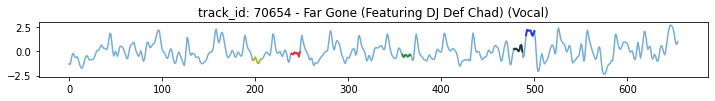

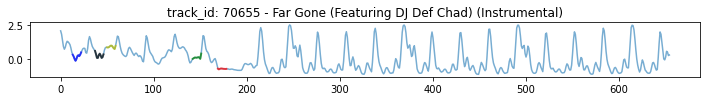

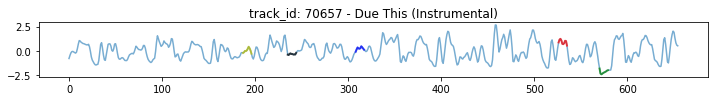

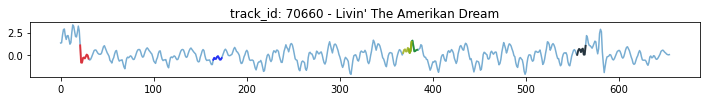

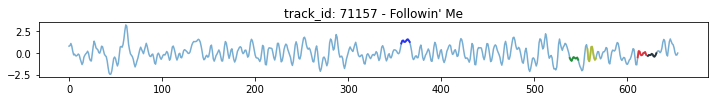

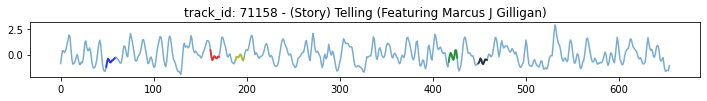

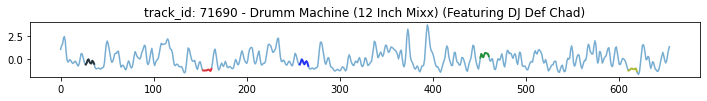

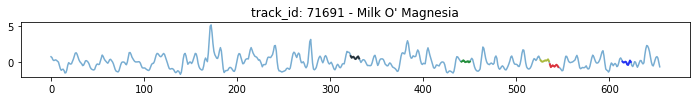

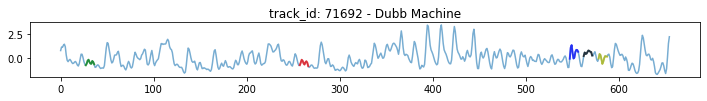

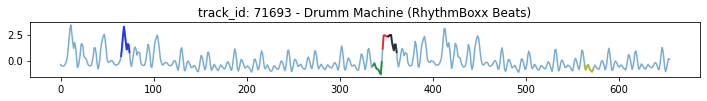

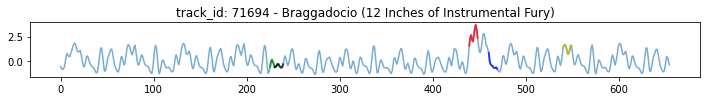

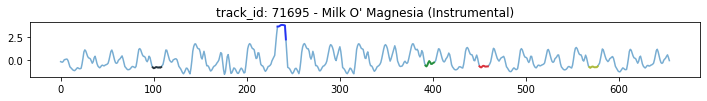

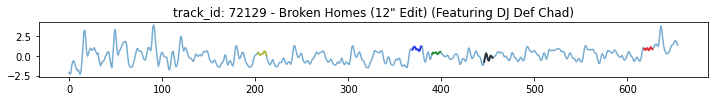

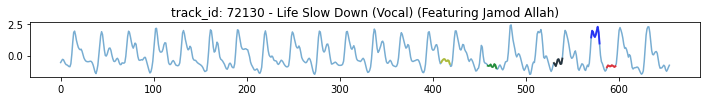

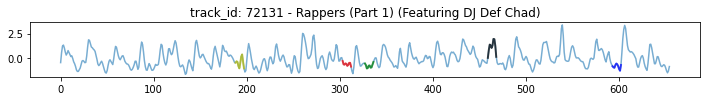

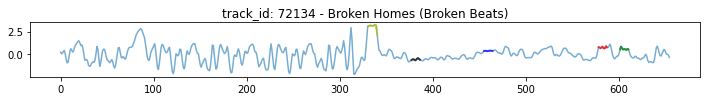

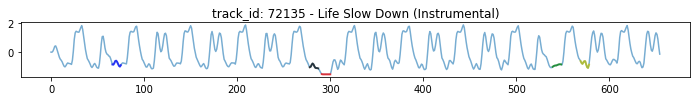

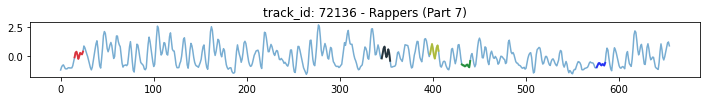

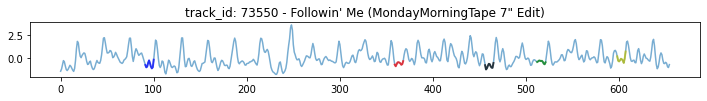

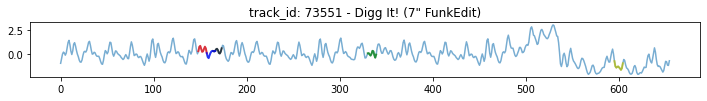

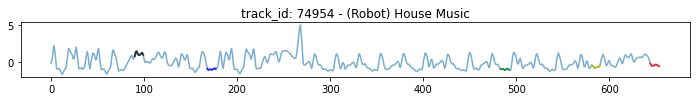

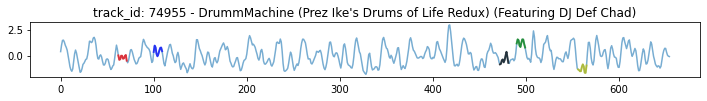

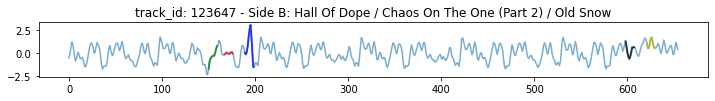

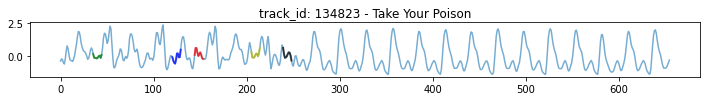

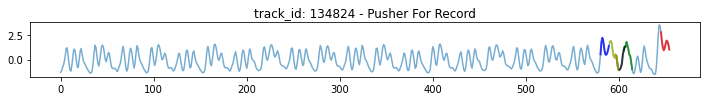

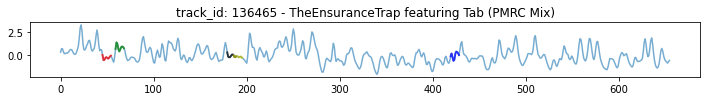

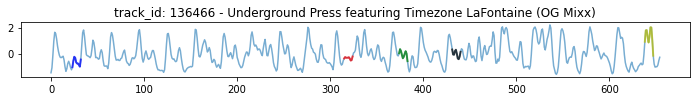

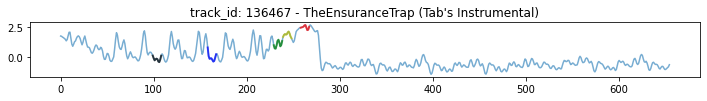

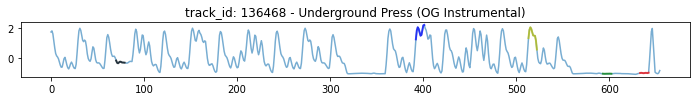

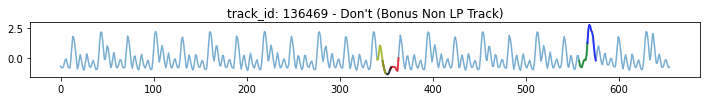

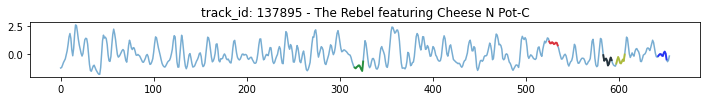

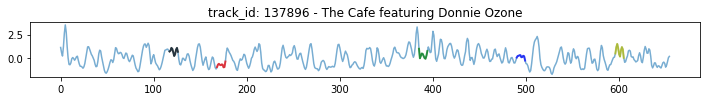

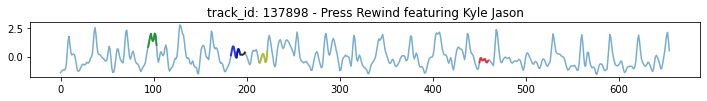

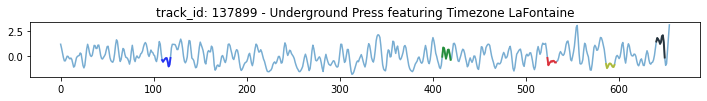

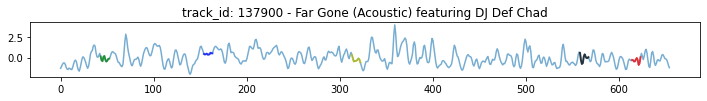

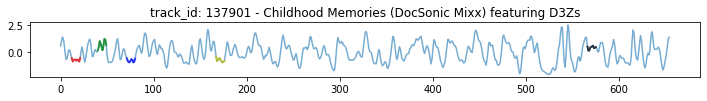

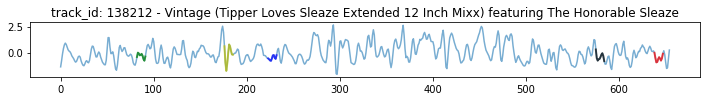

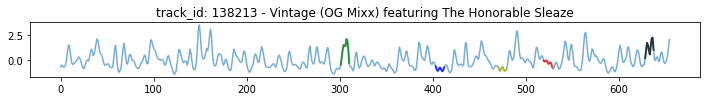

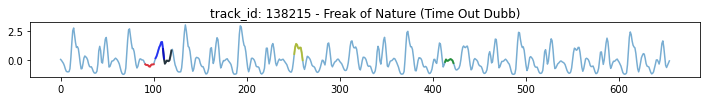

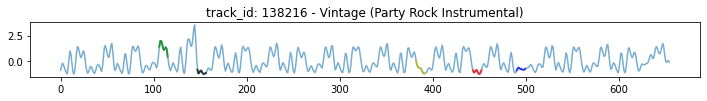

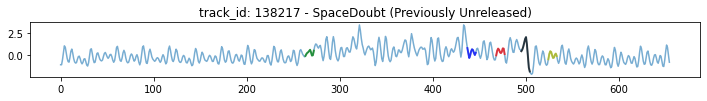

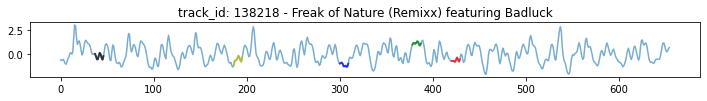

In [64]:
for track, mp, track_id, title in zip(df_cdoc, mp_cdoc, id_cdoc,cdoc_songtitle):
    anoms = discords(mp, ex_zone=5, k=5)
    plt.figure(figsize=(12,1))
    plt.title("track_id: {} - {}".format(track_id, title))
    plt.plot(track, alpha=0.6)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms)]
    for a, c in zip(anoms, colors):
        a_shape = track[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=2, alpha=0.7)

    plt.show()

## 6th-SENSE

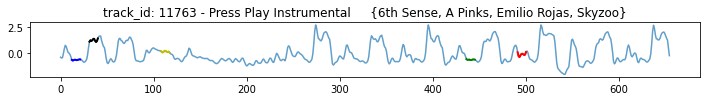

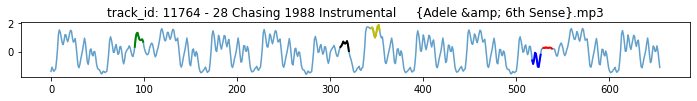

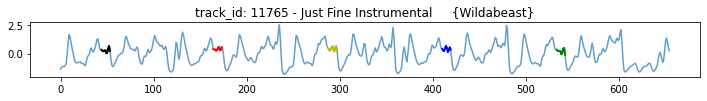

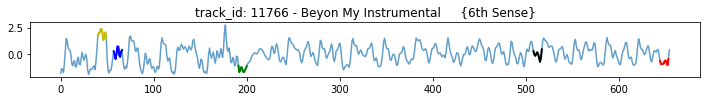

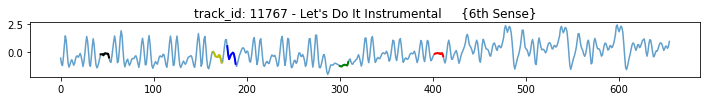

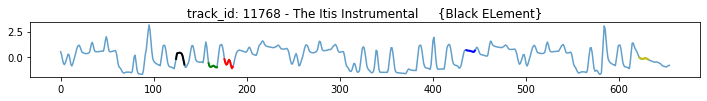

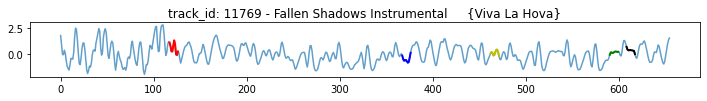

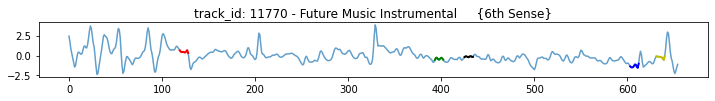

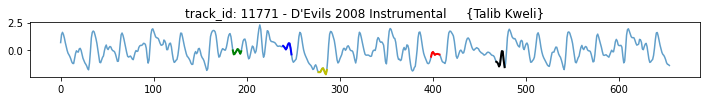

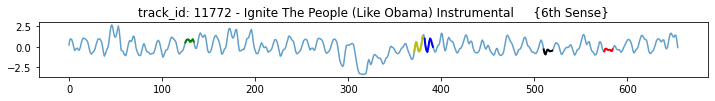

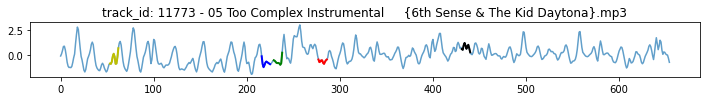

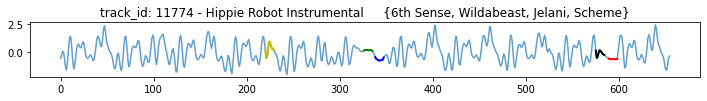

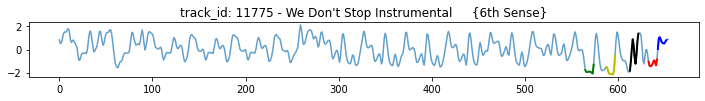

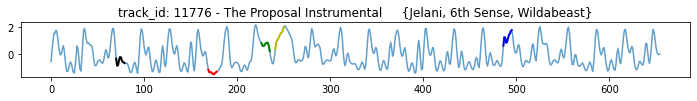

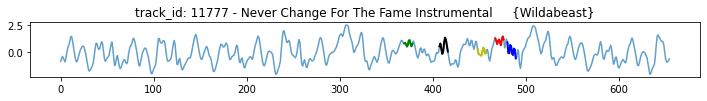

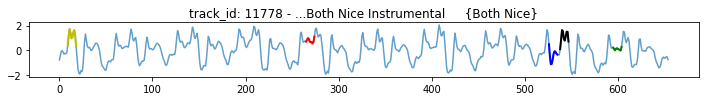

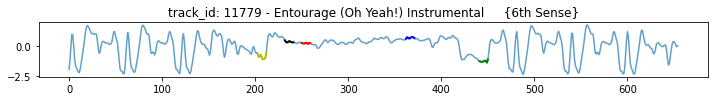

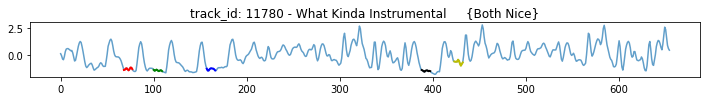

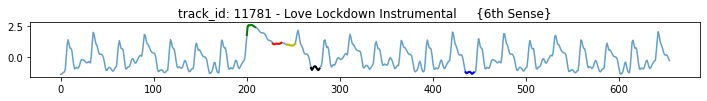

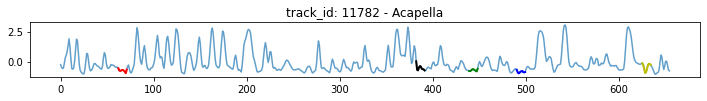

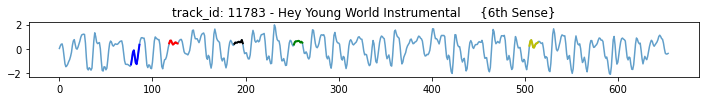

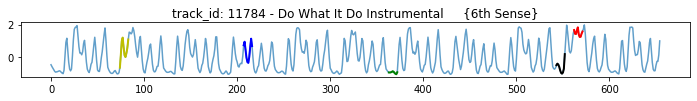

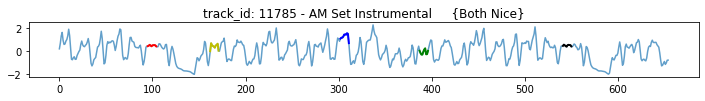

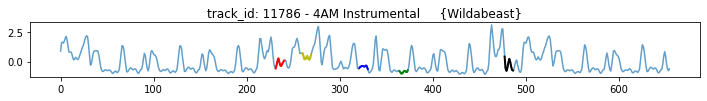

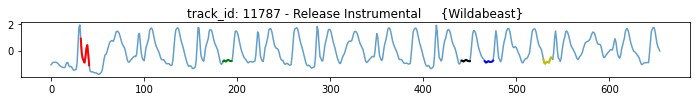

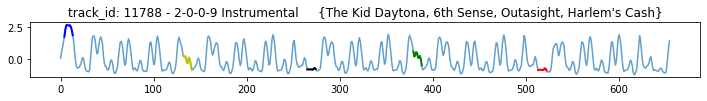

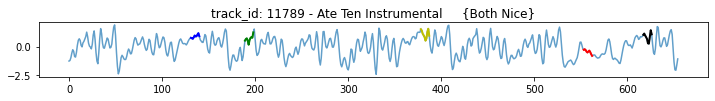

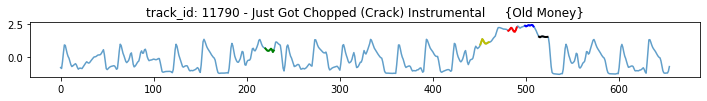

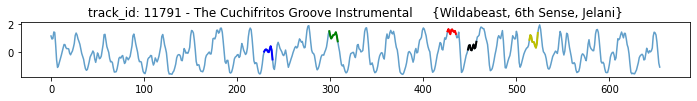

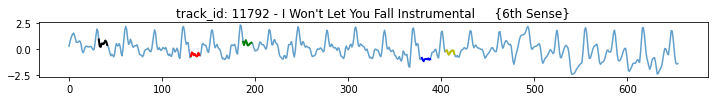

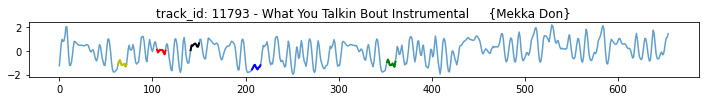

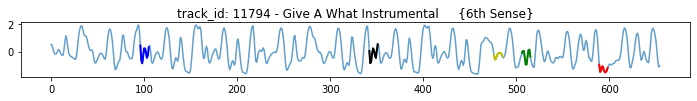

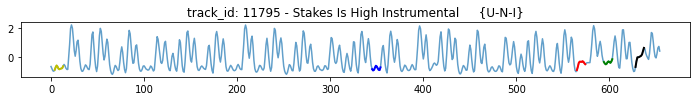

In [53]:
for track, mp, track_id, title in zip(df_6ix, mp_6ix, id_6ix,_6ix_songtitle ):
    anoms = discords(mp, ex_zone=10, k=5)
    plt.figure(figsize=(12,1))
    plt.title("track_id: {} - {}".format(track_id, title))
    plt.plot(track, alpha=0.7)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(anoms)]
    for a, c in zip(anoms, colors):
        a_shape = track[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=2)

    plt.show()